In [1]:
from torch.utils.data import Dataset
import os 
import torch 
import numpy as np 
import pydicom
import glob
import cv2
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-oohuq5vv because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is dep

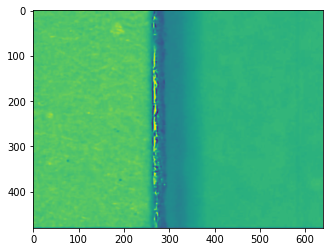

In [140]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 使用 OpenCV 讀取圖檔
img_bgr = cv2.imread('6.jpg')
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5) , 0)
plt.imshow(blurred)
plt.show()

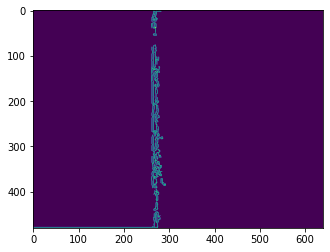

In [141]:
canny = cv2.Canny(blurred, 10, 200)
# 將 BGR 圖片轉為 RGB 圖片
img_rgb = img_bgr[:,:,::-1]
# 或是這樣亦可
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 使用 Matplotlib 顯示圖片
plt.imshow(canny)
plt.show()

In [146]:
i = 0
j = 0
flag = 0
edge = []
for j in range(480):
    #print('y = ',j)
    
    for i in range(640):
        #print(canny[1,i-1])
        #print(i, canny.shape[1]-i)
        if canny[ j, i] != 0:
            flag = i
        if i == 639:
            #print(flag)
            edge.append(flag)
            

In [143]:
i = 0
j = 0
start_edge = []
for j in range(480):
    #print('y = ',j)
    
    for i in range(640):
        #print(canny[1,i-1])
        #print(i, canny.shape[1]-i)
        if canny[ j, i] != 0:
            #print(i)
            start_edge.append(i)
            #y.append(1)
            break

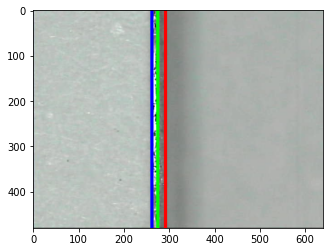

In [144]:
img_bgr = cv2.imread('6.jpg')
start_line = int(np.median(start_edge))
end_line = int(np.max(edge))
avg_line = int(np.mean(edge))
cv2.line(img_bgr, (start_line, 0), (start_line, 480), (255, 0, 0), 5)
cv2.line(img_bgr, (end_line, 0), (end_line, 480), (0, 0, 255), 5)
cv2.line(img_bgr, (avg_line, 0), (avg_line, 480), (0, 255, 0), 5)
img_rgb = img_bgr[:,:,::-1]
# 或是這樣亦可
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 使用 Matplotlib 顯示圖片
plt.imshow(img_rgb)
plt.show()

In [184]:
print('Sa = ', np.mean(edge) - np.mean(start_edge) )
print('Nc = ')
print('Smax = ', np.max(edge) - np.mean(start_edge))
print('Stm = ' , stm_avg)
print('Sq = ',sq)
print('Pv = ', np.max(edge)-np.mean(edge))

Sa =  11.68923303834805
Nc = 
Smax =  28.6725663716814
Stm =  23.6
Sq =  12.391881397930007
Pv =  16.98333333333335


In [177]:
stm = edge
stm.sort()
stm_up = stm[-5:]
stm_dn = stm[0:5]
stm_avg = (sum(stm_up) - sum(stm_dn))/5

23.6

In [183]:
dis = (edge - np.mean(start_edge))
len_dis = len(dis)
sq = np.sqrt(sum(np.power(dis,2))/len_dis)

In [133]:
print(start_line - end_line)

-13


In [150]:
np.mean(start_edge)

263.3274336283186

In [137]:
np.mean(edge)

263.56875

In [187]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 使用 OpenCV 讀取圖檔
img_bgr = cv2.imread('6.jpg')
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5) , 0)
canny = cv2.Canny(blurred, 10, 200)

#尋找邊界
i = 0
j = 0
flag = 0
edge = []
for j in range(480):
    #print('y = ',j)
    
    for i in range(640):
        #print(canny[1,i-1])
        #print(i, canny.shape[1]-i)
        if canny[ j, i] != 0:
            flag = i
        if i == 639:
            #print(flag)
            edge.append(flag)

#尋找左邊界
i = 0
j = 0
start_edge = []
for j in range(480):
    #print('y = ',j)
    
    for i in range(640):
        #print(canny[1,i-1])
        #print(i, canny.shape[1]-i)
        if canny[ j, i] != 0:
            #print(i)
            start_edge.append(i)
            #y.append(1)
            break
'''
#Stm計算
stm = edge
stm.sort()
stm_up = stm[-5:]
stm_dn = stm[0:5]
stm_avg = (sum(stm_up) - sum(stm_dn))/5
'''
#Sq計算
dis = (edge - np.mean(start_edge))
len_dis = len(dis)
np.sqrt(sum(np.power(dis,2))/len_dis)

print('Sa = ', np.mean(edge) - np.mean(start_edge) )
print('Nc = ', nc)
print('Smax = ', np.max(edge) - np.mean(start_edge))
print('Stm = ' , stm_avg)
print('Sq = ',sq)
print('Pv = ', np.max(edge)-np.mean(edge))

Sa =  11.68923303834805
Nc = 
Smax =  28.6725663716814
Sq =  12.391881397930007
Pv =  16.98333333333335


In [203]:
c = 0
avg = np.mean(edge)
flag = 1
nc = 0
for c in range(len(edge)):
    if (edge[c] >= avg) and (flag != 1):
        flag = 1
        nc = nc+1
        print('u',c)
    if (edge[c] < avg) and (flag == 1):
        flag = 0
        print('d',c)
print(nc)

d 4
u 103
d 112
u 124
d 138
u 157
d 170
u 200
d 204
u 217
d 225
u 231
d 238
u 257
d 265
u 266
d 267
u 270
d 285
u 296
d 302
u 306
d 325
u 333
d 367
u 371
d 387
u 401
d 407
u 446
d 467
15


In [205]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 使用 OpenCV 讀取圖檔
img_bgr = cv2.imread('6.jpg')
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5) , 0)
canny = cv2.Canny(blurred, 10, 200)

#尋找邊界
i = 0
j = 0
flag = 0
edge = []
for j in range(480):
    #print('y = ',j)
    
    for i in range(640):
        #print(canny[1,i-1])
        #print(i, canny.shape[1]-i)
        if canny[ j, i] != 0:
            flag = i
        if i == 639:
            #print(flag)
            edge.append(flag)

#尋找左邊界
i = 0
j = 0
start_edge = []
for j in range(480):
    #print('y = ',j)
    
    for i in range(640):
        #print(canny[1,i-1])
        #print(i, canny.shape[1]-i)
        if canny[ j, i] != 0:
            #print(i)
            start_edge.append(i)
            #y.append(1)
            break
#nc計算
c = 0
avg = np.mean(edge)
flag = 1
nc = 0
for c in range(len(edge)):
    if (edge[c] >= avg) and (flag != 1):
        flag = 1
        nc = nc+1
    if (edge[c] < avg) and (flag == 1):
        flag = 0

#Stm計算
stm = edge
stm.sort()
stm_up = stm[-5:]
stm_dn = stm[0:5]
stm_avg = (sum(stm_up) - sum(stm_dn))/5

#Sq計算
dis = (edge - np.mean(start_edge))
len_dis = len(dis)
np.sqrt(sum(np.power(dis,2))/len_dis)

print('Sa = ', np.mean(edge) - np.mean(start_edge) )
print('Nc = ', nc)
print('Smax = ', np.max(edge) - np.mean(start_edge))
print('Stm = ' , stm_avg)
print('Sq = ',sq)
print('Pv = ', np.max(edge)-np.mean(edge))

Sa =  11.68923303834805
Nc =  15
Smax =  28.6725663716814
Stm =  23.6
Sq =  12.391881397930007
Pv =  16.98333333333335
